In [1]:
from skimage import data
import numpy as np

In [2]:
import matplotlib.pyplot as plt


def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [3]:
import matplotlib.pyplot as plt


def plot_comparison(
    original, filtered, title_filtered, title_original="Original", sz=(10, 8)
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=sz, sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

# 10. Image restoration

- Fixing damaged images
- Text removing
- Logo removing
- Object removing

## Image reconstruction (Inpainting)
- Reconstructing lost parts ofimages
- Looking at the non-damaged regions

In [4]:
def get_mask(image):
    """ Creates mask with three defect regions """
    mask = np.zeros(image.shape[:-1])
    mask[15:50, 10:100] = 1
    return mask

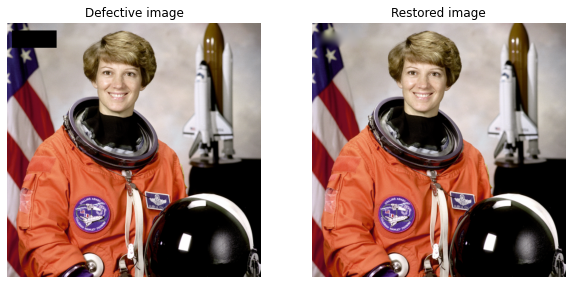

In [5]:
# Import the module from restoration
from skimage.restoration import inpaint

defect_image = data.astronaut()
defect_image[15:50, 10:100, :] = 0

# Show the defective image
# show_image(defect_image, "Image to restore")
mask = get_mask(defect_image)
# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
plot_comparison(defect_image, restored_image, "Restored image", "Defective image")
# show_image(restored_image)

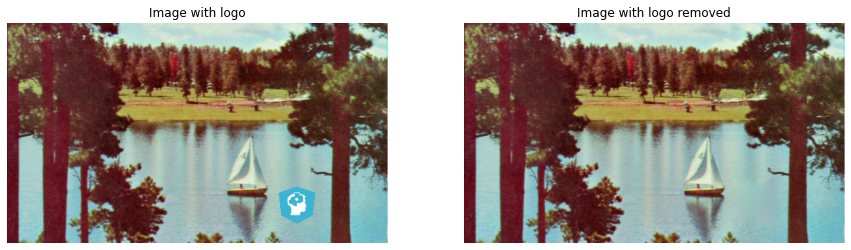

In [6]:
image_with_logo = plt.imread("images/image_with_logo.png")
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(
    image_with_logo, mask, multichannel=True
)

# Show the original and logo removed images
# show_image(image_with_logo, "Image with logo")
# show_image(image_logo_removed, "Image with logo removed")
plot_comparison(
    image_with_logo,
    image_logo_removed,
    "Image with logo removed",
    "Image with logo",
    sz=(15, 15),
)

# 11. Noise

## 11.1 Adding noise to the image

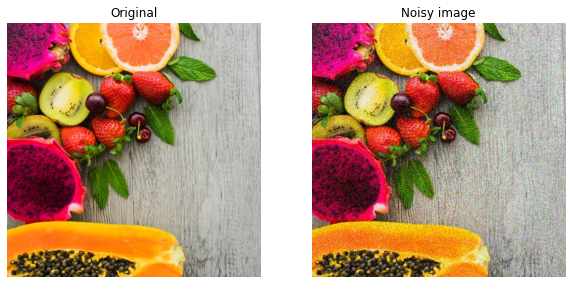

In [7]:
# Import the module and function
from skimage.util import random_noise

fruit_image = plt.imread("images/fruit_image.jpg")
# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
# show_image(fruit_image, "Original")
# show_image(noisy_image, "Noisy image")
plot_comparison(fruit_image, noisy_image, "Noisy image")

## 11.2 Removing noise from the image

- **Denoising types**
    - Total variation (TV)
    - Bilateral
    - Wavelet denoising
    - Non-local means denoising

## 11.2.1 Total Variation (TV)

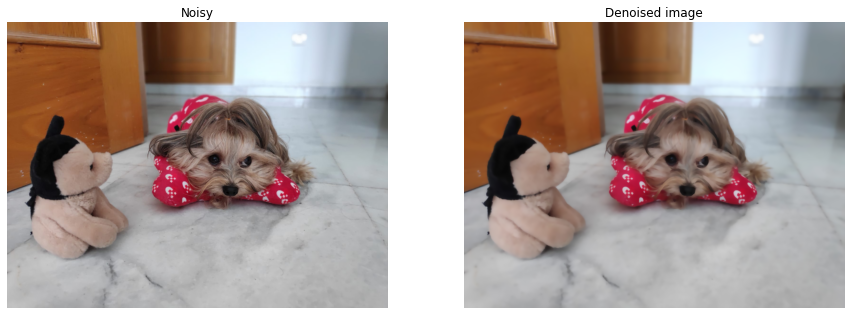

In [8]:
# Import the module and function (Smoothen Edges)
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread("images/noisy_image.jpeg")
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)

# Show the noisy and denoised images
# show_image(noisy_image, "Noisy")
# show_image(denoised_image, "Denoised image")
plot_comparison(noisy_image, denoised_image, "Denoised image", "Noisy", sz=(15, 15))

## 11.2.2 Bilateral filter

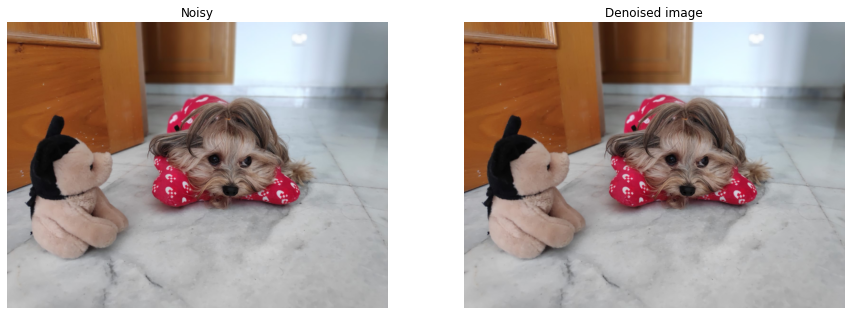

In [9]:
# Import bilateral denoising function (Preserve edges)
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

# Show original and resulting images
# show_image(noisy_image, "Noisy image")
# show_image(denoised_image, "Denoised image")
plot_comparison(noisy_image, denoised_image, "Denoised image", "Noisy", sz=(15, 15))

# 12. Superpixels & Segmentation
- **Benefits of superpixels**
    - More meaningful regions
    - Computational efficiency

- **Segmentation**
    - Supervised
    - Unsupervised
        - Simple Linear Iterative Clustering (SLIC)

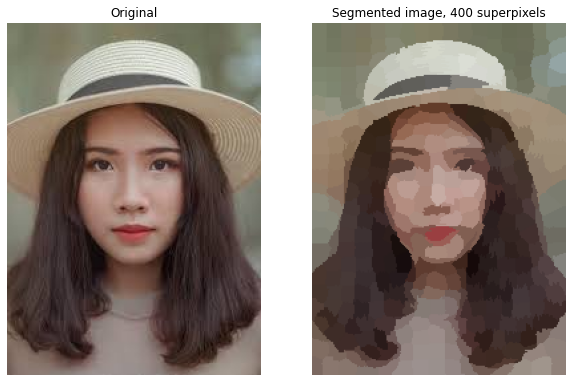

In [10]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# From 50,615 pixels to 400 regions!
face_image = plt.imread("images/face_image.jpg")
# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400, start_label=1)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind="avg", bg_label=0)

# Show the segmented image
# show_image(segmented_image, "Segmented image, 400 superpixels")
plot_comparison(face_image, segmented_image, "Segmented image, 400 superpixels")

# 13. Finding Contours
- Measure size
- Classify shapes
- Determine the number of objects

In [11]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
        plt.imshow(image, interpolation="nearest", cmap="gray_r")
        plt.title("Contours")
        plt.axis("off")
    plt.show()

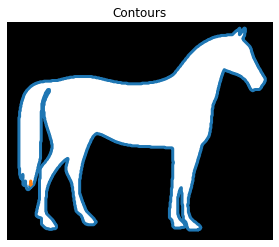

In [12]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

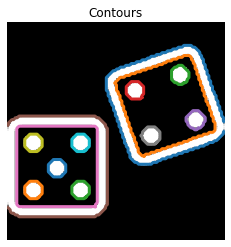

In [13]:
from skimage import color
from skimage.filters import threshold_otsu

# Make the image grayscale
image_dices = plt.imread("images/image_dices.png")
image_dices = color.rgb2gray(color.rgba2rgb(image_dices))

# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dices, contours)

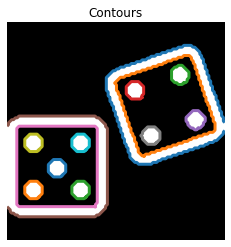

Dice's dots number: 9. 


In [14]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))